# Projekt - Wizualizacja Danych - 2023L <a name="W"></a>

<b>Autorzy:</b> Weronika Skiba, Hubert Buczyńskich, Michał Banaszczak i Daniel Ślusarczyk

**Opis zbioru danych:** <br> <a name="OP"></a>
Analizowany zbiór danych jest opisany jako uporządkowany i nie zawiera brakujących obiektów. Dodatkowo jest określonym mianem niezbilansowanego, co ma być rozumiane jako nierównomierne rozłożenie jakości win. Autor zbioru zaznacza, że nie wszystkie dostarczone atrybuty mogą być istotne.
<br>

**Opis atrybutów:** <br> <a name="OA"></a>
* **Kwasowość stała** (z ang. *fixed acidity*) - współczynnik określający kwasowość wina. Dotyczy kwasowości stałej i nielotnej (nie odparowującej).<br>
* **Kwasowość lotna** (z ang. *volatile acidity*) - współczynnik zawartości lotnych kwasów organicznych w winie. Głównie jest związany z kwasem octowym, który w 95% odpowiada za kwasowość lotną. Występuję w każdym winie i wielu przypadkach prowadzi do nieprzyjemnego octowego smaku, ale w pewnych granicach lotna kwasowość zwiększa odczuwanie aromatów owocowych w winie i zwiększa złożoność bukietu wina. <br>
* **Kwas cytrynowy** (z ang. *citric acid*) - współczynnik ilości kwasu cytrynowego w winie.  Kwas cytrnowy pozwala na regulowanie kwasowości wina, która bezpośrednio przekłada się na smak, nadając winu wrażenie świeżości. <br>
* **Cukier resztkowy** (z ang. *residual sugar*) - ilość cukru w g/l pozostała po zatrzymaniu procesu fermentacji. Poziom cukru resztkowego wpływa na rodzaj wina. Przyjmuje się, że parametr ten o wysokości 4 g/l dotyczy win wytrawnych (choć czasami mówi się o 10 g/l). Wina słodkie mogą mieć nawet 60 g/l i więcej. Cukier resztkowy ma duży wpływ na charakter wina wytrawnego i słodkiego.<br>
* **Chlorki** (z ang. *chlorides*) - poziom jonów chlorkowych w winie. Poziom ten może być ściśle związany z geograficznymi, geologicznymi i klimantycznymi warunkami uprawy winorośli. Z reguły poziom tych jonów jest niski, ale może być zwiększony w winach pochodzących z winnic w pobliżu wybrzeża lub mających ziemię nawadnianą słoną wodą. W takich warunkach poziom ten może sugerować dodanie soli do wina. <br>
* **Wolny dwutlenek siarki** (z ang. *free sulfur dioxide*) -  współczynnik zawartości wolnych związków dwutlenku siarki. Dwutlenek siarki w winie ma dwa zastosowania: usuwa niepożądane mikroorganizmy i zapobiega oksydacji. Zgodnie z prawem europejskim maksymalna zawartość SO2 wynosi 160 mg/l dla wytrawnych win czerwonych i 400 mg/l dla słodkich. Uznaje się, że obecność siarki wolnej odbiera winu autentyczny charakter, gdyż znacząco zmienia jego aromat i może prowadzić do komplikacji zdrowotnych.<br>
* **Całkowita zawartość siarki** (z ang. *total sulfur dioxide*) - ilość wolnych i związanych form SO2. W niskich stężeniach nie jest odbierana smakowo ani zapachowo. Nie jest szkodliwa dla zdrowia. Wina butelkowane bez dodatku siarki szybko tracą smak i nie nadają się do dłuższego przechowywania. Natomiast w winach przesiarkowanych cały bukiet smakowy jest zdominowany.
* **Gęstość** (z ang. *density*) - gęstość wina rozumiana jako stosunek określonej objętości w określonej temperaturze do jej objętości. Zwykle jest zbliżona do gęstości wody, ale może się różnić w zależności od procentowej zawartości alkoholu i cukru. <br>
* **pH** - skala opisująca jest kwasowa lub zasadowa jest substancja przypisując wartość od 0 (bardzo kwaśna) do 14 (bardzo zasadowa). Generalnie wszystkie wina leżą po stronie kwaśnej widma pH w zakresie od 2,5 do 4,5. Kwasowość nadaje winu cierpki i kwaśny smak.  <br>
* **Siarczyny** (z ang. *sulphates*) - ilość dodatku do wina, który może przyczynić się do zwiększenia poziomu dwutlenku siarki (SO2). Wino bez dodatku siarczynów jest bardzo trudne w przechowywaniu.<br>
* **Alkohol** (z ang. *alcohol*) - procent zawartości alkoholu w winie. Klasyfikacja win z względu na zawartość alkoholu dzieli wina w następujący sposób: wina lekkie (do 11%), wina średnio mocne (11%-14%), mocne (14%-16%), wzmacniane (15%-22%).<br>

**Wizualizacja danych:** <a name="AED"></a>

**Pobranie potrzebnych bibliotek:** <a name="PPB"></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

**Utworzenie ramek danych:** <a name="URD"></a>

In [3]:
rw = pd.read_csv('winequality-red.csv')
print(rw.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

**Sprawdzenie brakujących danych:** <a name="SBD"></a>

In [7]:
# Liczba danych brakujących
missing_data = []
for col in rw:
    for item in rw[col]:
        if(pd.isnull(item) == True):
            missing_data.append(1)
print("Liczba brakujących danych: %s" %(len(missing_data)))

Liczba brakujących danych: 0


**Informacje o zbiorze:** <a name="IOZ"></a>

In [8]:
print(rw.info())
# Liczba obiektów (obserwacji)
print("Liczba obiektów -", rw.shape[0])
# Liczba atrybutów
print("Liczba atrybutów -", rw.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
Liczba obiektów - 1599
Liczba atrybutów - 12


**Informacje o jakości:** <a name="IOJ"></a>

Występujące jakości:  [5 6 7 4 8 3]


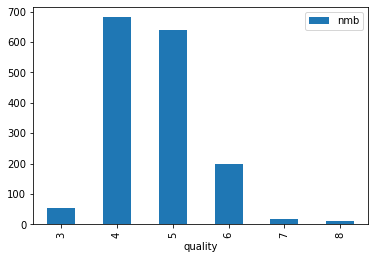

In [9]:
# Występujące jakości:
print("Występujące jakości: ", rw.iloc[:, -1].unique())
maxQuality = rw.iloc[:, -1].max()
minQuality = rw.iloc[:, -1].min()
counter = []
labels = []
for i in range(maxQuality - minQuality + 1):
    counter.append(0)
    labels.append(minQuality + i)
for quality in rw.iloc[:, -1]:
    counter[quality - minQuality - 1] = counter[quality - minQuality -1] + 1
    
df = pd.DataFrame(list(zip(labels, counter)), columns=['quality', 'nmb'])
df.plot(x ='quality', y='nmb', kind = 'bar')
plt.show()

Zbiór zawiera bardzo dużo win przeciętnych, charakteryzujących się jakościa w przedziale 4-6. Wina bardzo dobrej jakości (7/8) stanowią niewielki odsetek, a win, które osiągają najlepszą możliwą jakość, zbiór nie zawiera wcale. Analogicznie jest z winami o niskiej jakości. Zbiór danych zawiera ich tylko około 50 na 1600 pozycji.

**Informacje o atrybutach:** <a name="IOA"></a>

In [10]:
print(rw.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

**Analiza atrybutów bez odniesienia do jakości:** <a name="AABODJ"></a>

<AxesSubplot:>

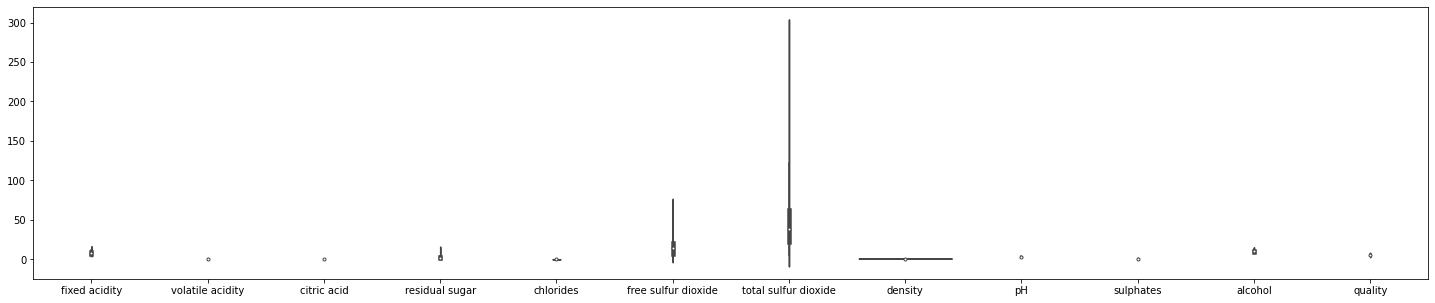

In [112]:
#Atrybuty bez odniesienia do jakości:
plt.figure(figsize=(25,5))
sns.violinplot(data = rw)

Analiza wykresu atrybutów pozwala zauważyć, że wiekszość cech występuje w bardzo małym zakresie. Wyjątkami od tej reguły są jedynie wolny dwutlenek siarki i całkowita zawartość siarki. Warto również zauważyć, że gęstość win jest praktycznie identyczna w całym zbiorze, co przejawia się na wykresie w postaci pionowej linii.

**Atrybut kwasowości stałej:** <a name="AKS"></a>

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

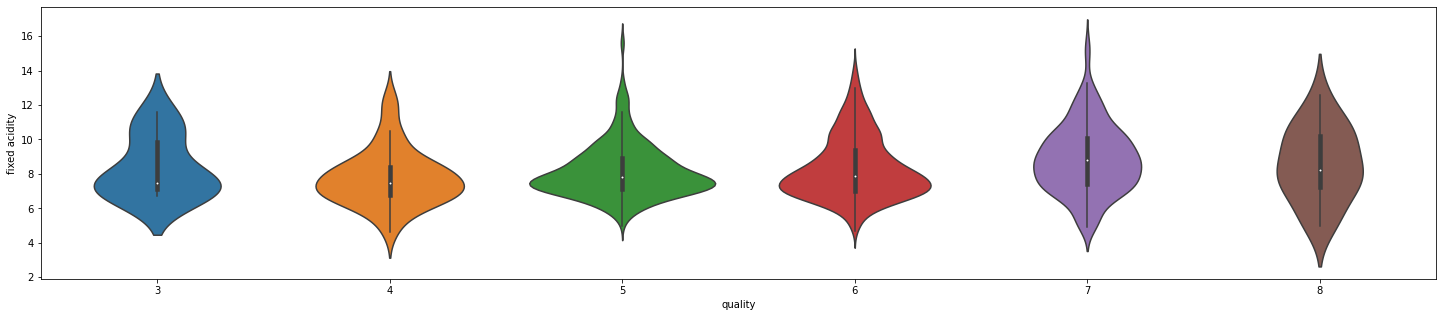

In [113]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'fixed acidity', data = rw)

Atrybut kwasowości stałej nie wykazuje większego wpływu na jakość wina

**Atrybut kwasowości lotnej:** <a name="AKL"></a>

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

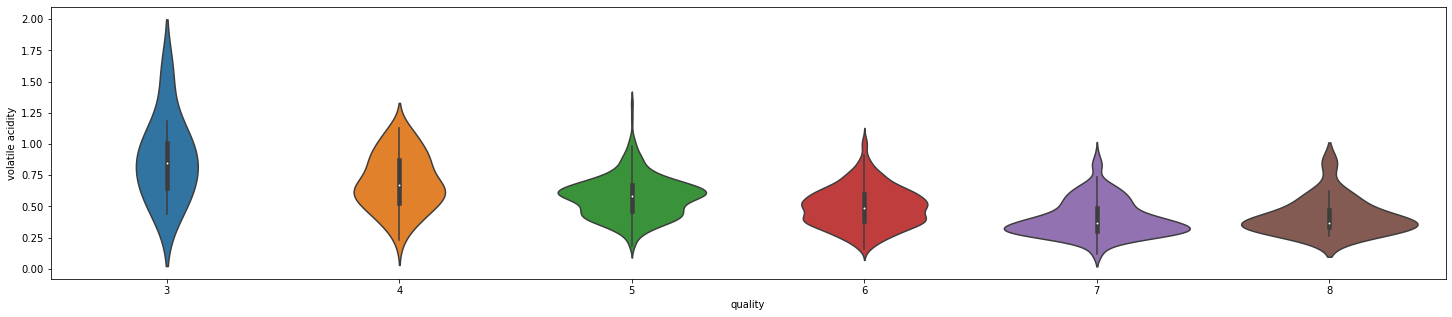

In [114]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'volatile acidity', data = rw)

Analiza wykresu dla atrybutu kwasowości stałej pozwala stwierdzić, że wina lepszej jakości charakteryzują się mniejszą wartością tego czynnika.

**Atrybut kwasu cytrynowego:** <a name="AKC"></a>

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

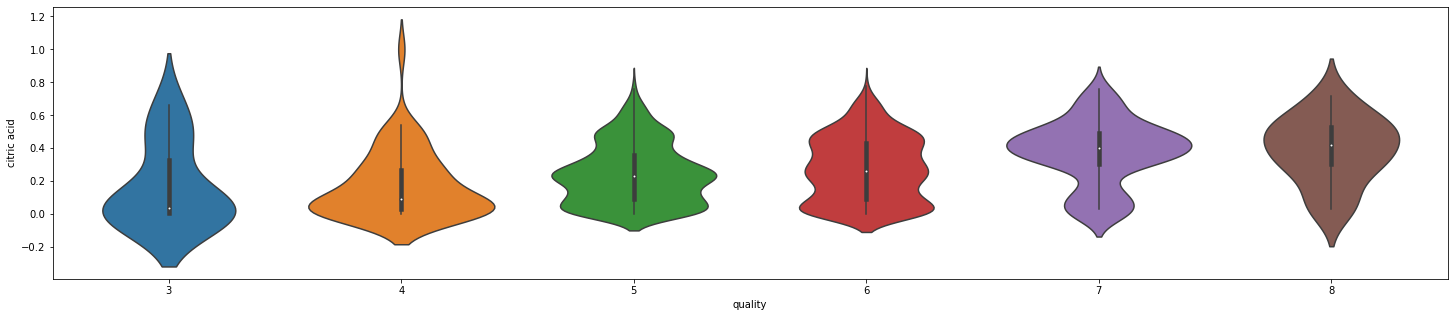

In [115]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'citric acid', data = rw)

Atrybut kwasu cytrynowego występuje w podobnym zakresie dla wszystkich jakości win. Niemniej jednak analiza histogramów pozwala stwierdzić, że dla lepszej jakości wina wartość tego atrybutu statystycznie przyjmuje większe wartości.

**Atrybut cukru resztkowego:** <a name="ACR"></a>

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

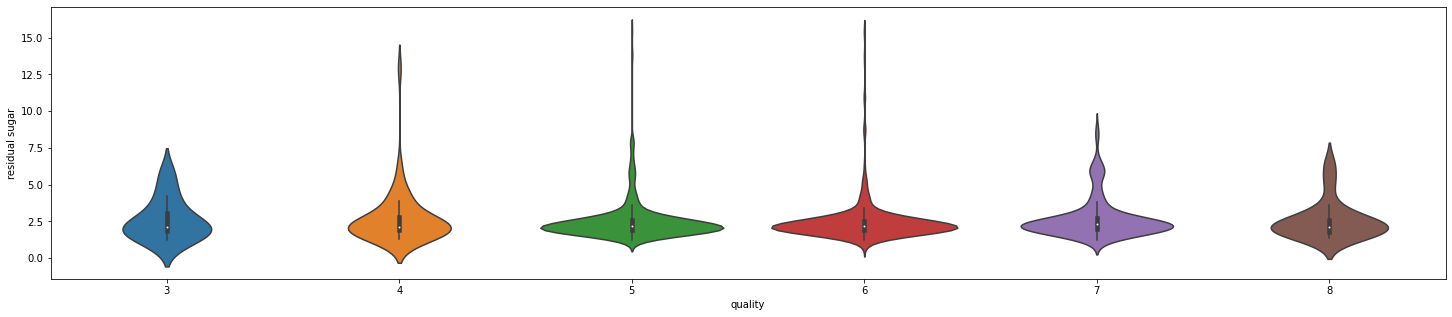

In [116]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'residual sugar', data = rw)

Atrybut cukru resztkowego nie wykazuje większego wpływu na jakość. Przyjmuje podobne wartości niezależnie od jakości wina (z wyłączeniem niewielkiej ilości punktów odstających).

**Atrybut chlorków:** <a name="AC"></a>

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

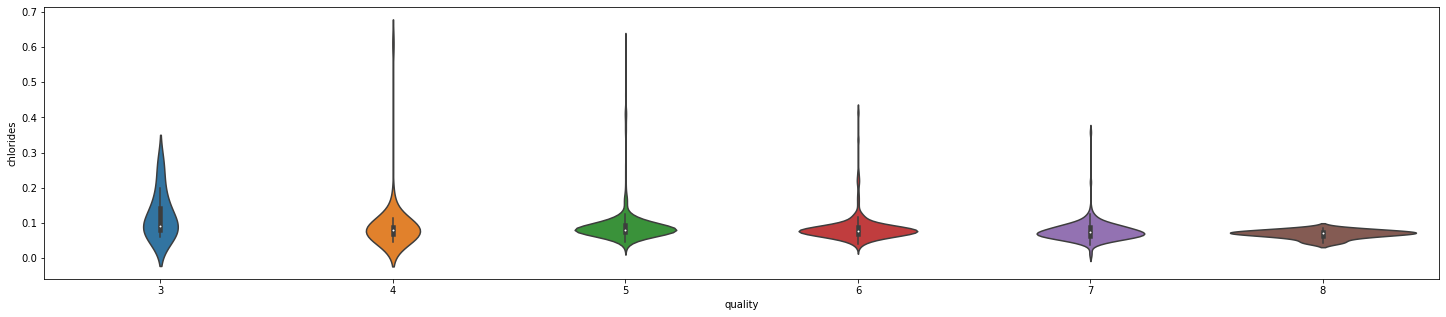

In [117]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'chlorides', data = rw)

Genereralnie zawartość chlorków jest mniejsza w wina dobrej jakości, ale różnice te nie są duże.

**Atrybut wolnego dwutlenku siarki:** <a name="AWDS"></a>

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

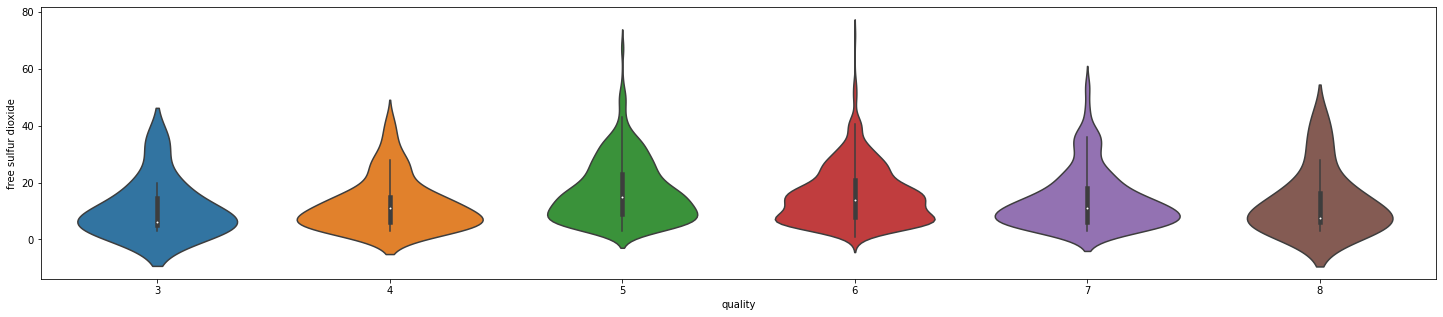

In [118]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'free sulfur dioxide', data = rw)

Wolne związki siarki nie wpływają wyraźnie na jakość wina.

**Atrybut całkowitej zawartości siarki:** <a name="ACZS"></a>

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

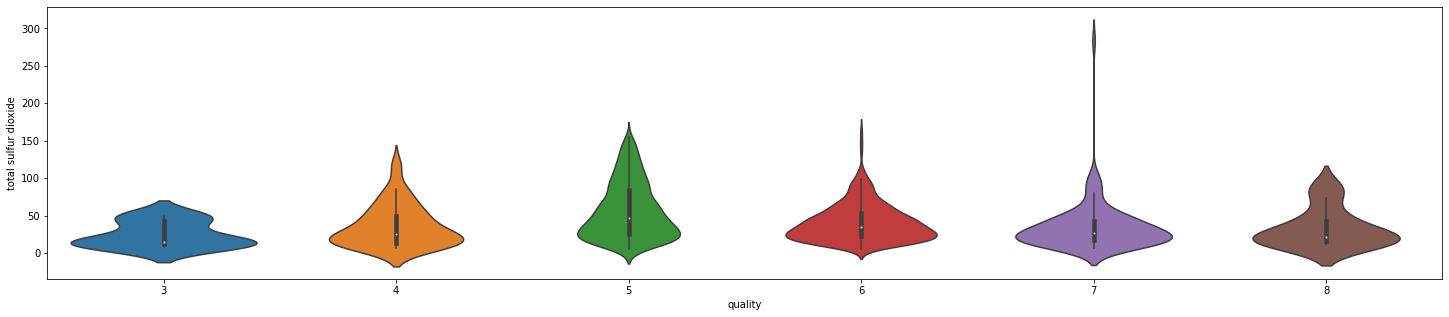

In [119]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'total sulfur dioxide', data = rw)

Atrybut całkowitej zawartości siarki, podobnie jak atrybutu powyżej, nie wykazuje wpływu na jakość wina.

**Atrybut gęstości:** <a name="AG"></a>

<AxesSubplot:xlabel='quality', ylabel='density'>

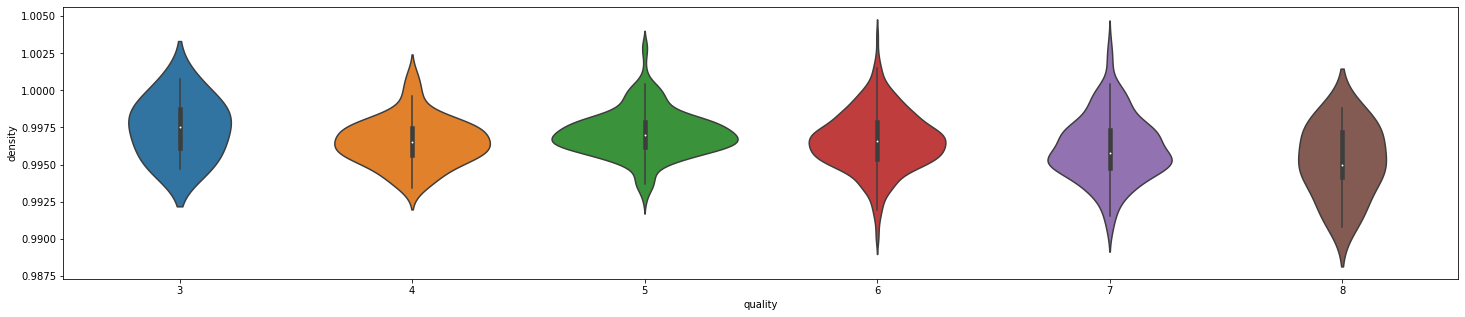

In [120]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'density', data = rw)

Atrybut gęstości nie ma wpływu na jakość wina.

**Atrybut pH:** <a name="AP"></a>

<AxesSubplot:xlabel='quality', ylabel='pH'>

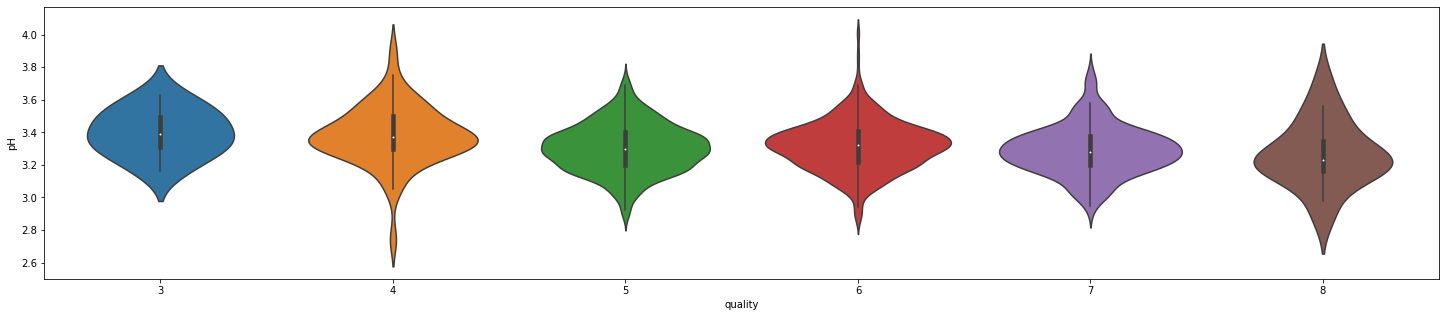

In [121]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'pH', data = rw)

Atrybut ph nie ma wpływu na jakość wina.

**Atrybut zawartości siarczyn:** <a name="AZS"></a>

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

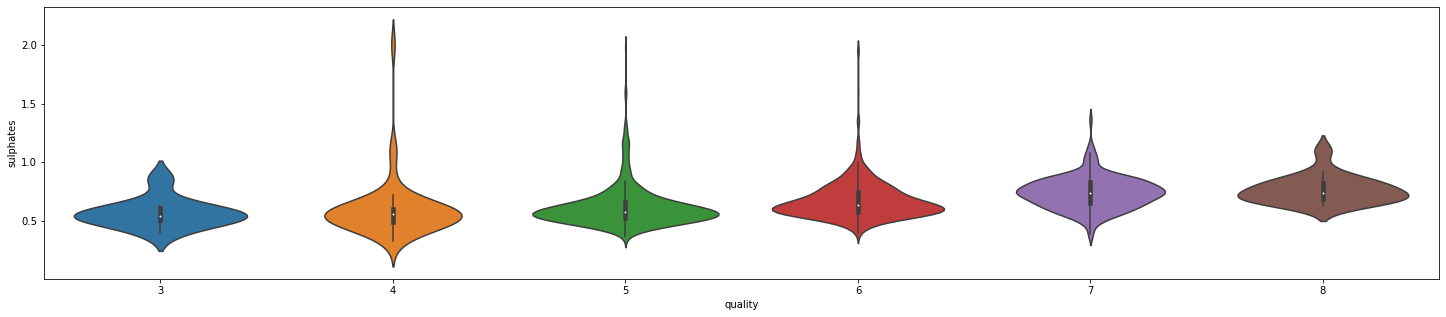

In [122]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'sulphates', data = rw)

Zawartość siarczyn wyraźnie wpływa na jakość wina. Większa wartość tego atrybutu sugeruje lepszą jakość wina.

**Atrybut zawartości alkoholu:** <a name="AZA"></a>

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

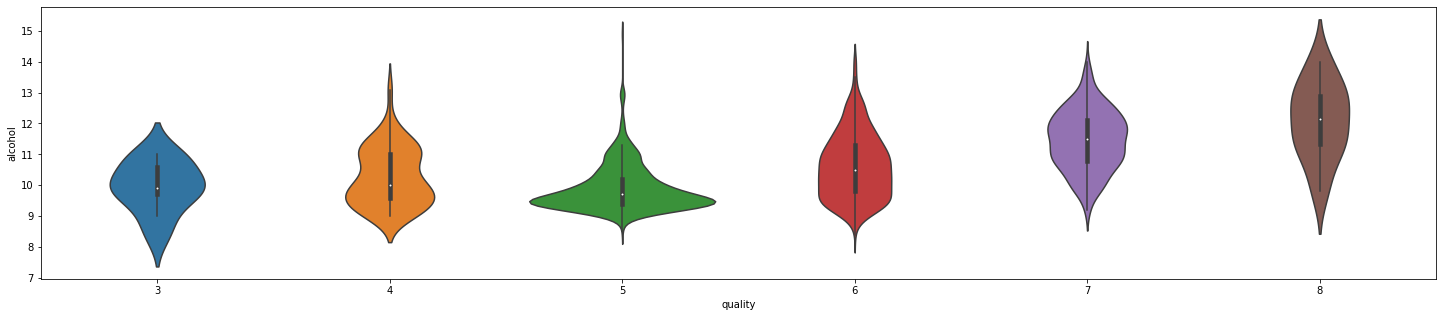

In [123]:
plt.figure(figsize=(25,5))
sns.violinplot(x = 'quality', y = 'alcohol', data = rw)

Większa zawartość alkoholu charakteryzuje wina lepszej jakości.

**Korelacja danych:** <a name="KD"></a>

**Macierz:** <a name="M"></a>

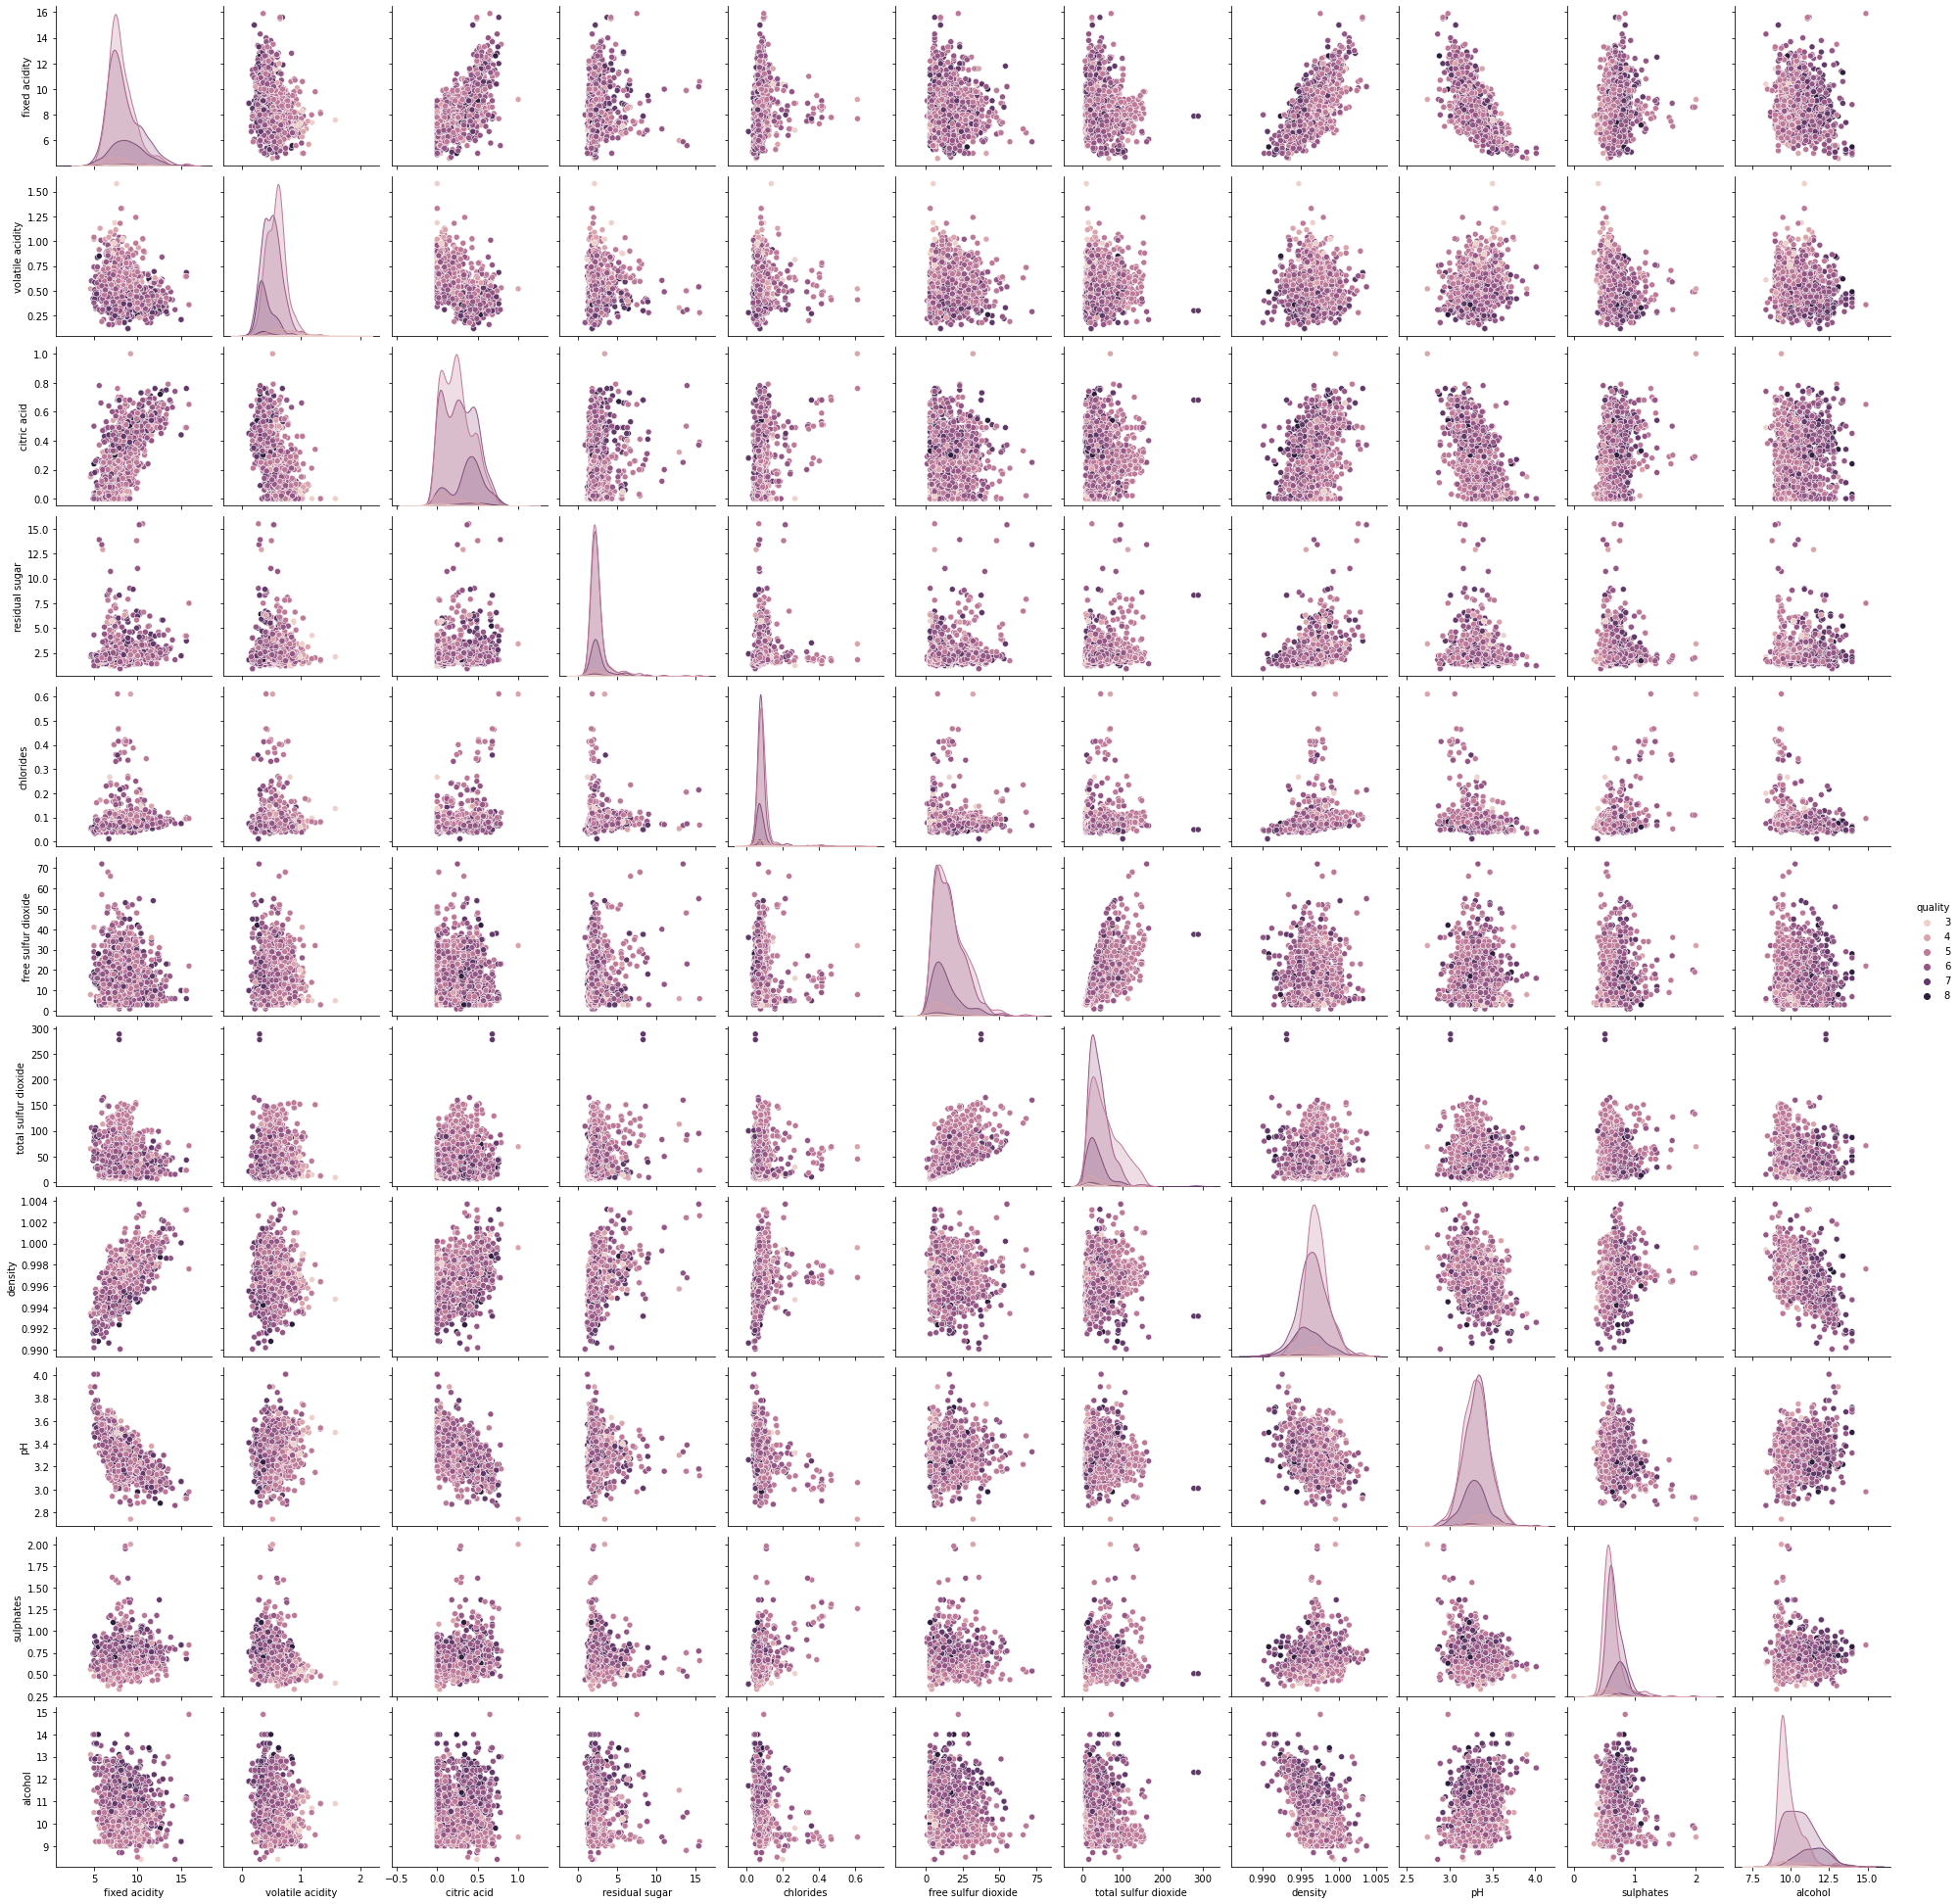

In [150]:
# Macierz atrybutów
sns.pairplot(rw, kind="scatter", hue = "quality")
plt.show()

**Mapa ciepła:** <a name="MC"></a>

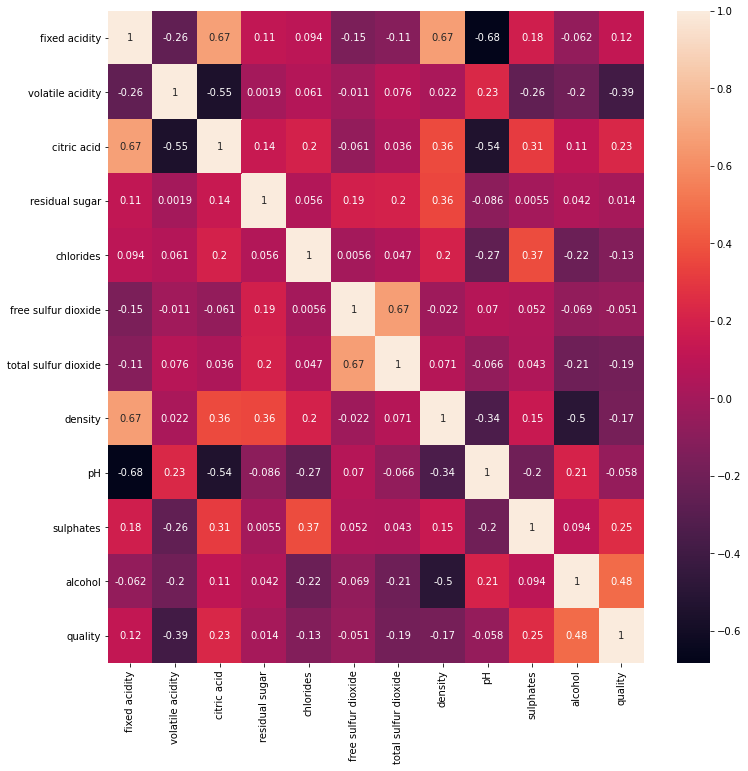

In [126]:
# Mapa ciepła
plt.figure(figsize=(12,12))
sns.heatmap(data=rw.corr(), annot=True)
plt.show()

**Wnioski:** <a name="W2"></a>
* Jakość wina wykazuje największą dodatnią korelację z zawartościa alkoholu. Następny atrybut w kolejności korelacji z jakością wykazuje prawie dwa razy mniejszy współczynnik korelacji. Na tej podstawie można postawić tezę, że alkohol jest bardzo znaczącym atrybutem w ocenie jakości alkoholu.
* Istnieje stosunkowo wysoka dodatnia korelacja między gęstością i stała kwasowością, stałą kwasowością i kwasem cytrynowym.
* Wartość bezwględna z ujemnej korelacji pomiędzy pH, a stałą kwasowością jest na poziomie 0,68. Stanowi to największą wartość w całym zbiorze i jest to wartość zgadzająca się z oczekiwaniami teoretycznymi, ponieważ kwasowość bezpośrednio wpływa na skalę pH - im mniejsza kwasowość, tym większa wartość na skali pH. Na podobnej zasadzie występuje korelacja pomiędzy kwasem cytrynowym i stałą kwasowością, oraz kwasem cytrynowym i pH.
* Nie istnieje atrybut, który kategorycznie może zostać określony jako atrybut nadmiarowy. Najbardziej w kryteria atrybutu zbędnego wpisuje się gęstość, która nie ma wpływu na jakość i jest silnie skorelowana z stałą kwasowością. Innym przykładem może być pH, które również nie ma związku z jakością, a jego wartość mocno zależy od innego atrybutu. 

**Zbiór:** <a name="BIB"></a>

* https://archive.ics.uci.edu/ml/datasets/wine+quality <br>